# Import data

In [287]:
import warnings
warnings.filterwarnings('ignore')

In [288]:
# import python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [289]:
pd.set_option('display.max_columns', None)

In [290]:
# Read data leads.csv
lead = pd.read_csv("Leads.csv")
lead.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

# Data Exploration

In [291]:
lead.shape

(9240, 37)

In [292]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [293]:
lead.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [294]:
numeric_attr = lead.select_dtypes(exclude='object').columns
cate_attr = lead.select_dtypes(include='object').columns

In [295]:
pd.set_option('display.max_colwidth', 400) # Để nhìn rõ hơn
def missing_ratio(df):
    return (df.isna().mean() * 100).round(1)
def num_values(df):
    return df.nunique()
def value_ratios(c):
    return dict((c.value_counts(normalize=True) * 100).round(1))
info = lead[cate_attr].agg([missing_ratio, num_values, value_ratios])
info

Prospect ID  \
missing_ratio                                                                                                                                                                                                                                                                                                                                                                                                              0.0   
num_values                                                                                                                                                                                                                                                                                                                                                                                                                9240   
value_ratios   {'7927b2df-8bba-4d29-b9a2-b6e0beafe620': 0.0, '22e9d4ef-d294-4ebf-81c7-7c7a1105aeea': 0.0, '46befc49-253a-419b-abea-2fd978d2e2b1': 0.0, '9d35a2c2-09d8-439f-9875-0e8bbf267f5a': 0.0, 'f0de9371-4dc2-48c2-9785-a08d6fc4fcb5': 0.0, '446a290f-b78f-413b-8912-d9c79a847e3a': 0.0, '38826741-ffe2-4d37-89c4-1140c66c5560': 0.0, 'f08604ae-a2fa-4d64-8a42-a95ff2bddfed': 0.0, 'ce9c2fa0-d2ff-493d-82a9-20c81b175b...   

                                                                                                                   Lead Origin  \
missing_ratio                                                                                                              0.0   
num_values                                                                                                                   5   
value_ratios   {'Landing Page Submission': 52.9, 'API': 38.7, 'Lead Add Form': 7.8, 'Lead Import': 0.6, 'Quick Add Form': 0.0}   

                                                                                                                                                                                                                                                                                                                                                                                                                   Lead Source  \
missing_ratio                                                                                                                                                                                                                                                                                                                                                                                                              0.4   
num_values                                                                                                                                                                                                                                                                                                                                                                                                                  21   
value_ratios   {'Google': 31.2, 'Direct Traffic': 27.6, 'Olark Chat': 19.1, 'Organic Search': 12.5, 'Reference': 5.8, 'Welingak Website': 1.5, 'Referral Sites': 1.4, 'Facebook': 0.6, 'bing': 0.1, 'google': 0.1, 'Click2call': 0.0, 'Press_Release': 0.0, 'Social Media': 0.0, 'Live Chat': 0.0, 'youtubechannel': 0.0, 'testone': 0.0, 'Pay per Click Ads': 0.0, 'welearnblog_Home': 0.0, 'WeLearn': 0.0, 'blog': 0.0, '...   

                           Do Not Email                Do Not Call  \
missing_ratio                       0.0                        0.0   
num_values                            2                          2   
value_ratios   {'No': 92.1, 'Yes': 7.9}  {'No': 100.0, 'Yes': 0.0}   

                                                                                                                                                                                                                                                               

# Data Preprocessing

## Category atrributes

#### Get one-value columns and duplicated meaning columns to remove

In [296]:
drop_cols = info.loc[:, info.loc['num_values']==1].columns.to_list()

In [297]:
drop_cols.extend(['Prospect ID','Do Not Call','What matters most to you in choosing a course', 'Search', 'Newspaper Article', \
                  'X Education Forums','Newspaper', 'Digital Advertisement', 'Through Recommendations'])

In [298]:
drop_cols.extend(['Asymmetrique Activity Index','Asymmetrique Profile Index'])

In [299]:
drop_cols

['Magazine',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'Prospect ID',
 'Do Not Call',
 'What matters most to you in choosing a course',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index']

In [300]:
lead.drop(columns = drop_cols, inplace=True)

In [301]:
cate_attr_1 = pd.Index(set(cate_attr) - set(drop_cols))
cate_attr_1

Index(['Tags', 'Last Activity', 'Lead Source', 'Lead Origin', 'City',
       'What is your current occupation', 'Lead Quality',
       'Last Notable Activity', 'Country', 'Specialization',
       'How did you hear about X Education',
       'A free copy of Mastering The Interview', 'Do Not Email',
       'Lead Profile'],
      dtype='object')

In [302]:
info_1 = lead[cate_attr_1].agg([missing_ratio, num_values, value_ratios])
info_1

Tags  \
missing_ratio                                                                                                                                                                                                                                                                                                                                                                                                             36.3   
num_values                                                                                                                                                                                                                                                                                                                                                                                                                  26   
value_ratios   {'Will revert after reading the email': 35.2, 'Ringing': 20.4, 'Interested in other courses': 8.7, 'Already a student': 7.9, 'Closed by Horizzon': 6.1, 'switched off': 4.1, 'Busy': 3.2, 'Lost to EINS': 3.0, 'Not doing further education': 2.5, 'Interested  in full time MBA': 2.0, 'Graduation in progress': 1.9, 'invalid number': 1.4, 'Diploma holder (Not Eligible)': 1.1, 'wrong number given': 0....   

                                                                                                                                                                                                                                                                                                                                                                                                                 Last Activity  \
missing_ratio                                                                                                                                                                                                                                                                                                                                                                                                              1.1   
num_values                                                                                                                                                                                                                                                                                                                                                                                                                  17   
value_ratios   {'Email Opened': 37.6, 'SMS Sent': 30.0, 'Olark Chat Conversation': 10.6, 'Page Visited on Website': 7.0, 'Converted to Lead': 4.7, 'Email Bounced': 3.6, 'Email Link Clicked': 2.9, 'Form Submitted on Website': 1.3, 'Unreachable': 1.0, 'Unsubscribed': 0.7, 'Had a Phone Conversation': 0.3, 'Approached upfront': 0.1, 'View in browser link Clicked': 0.1, 'Email Received': 0.0, 'Email Marked Spam':...   

                                                                                                                                                                                                                                                                                                                                                                                                                   Lead Source  \
missing_ratio                                                                                                                                                                                                                                                                                                                                                                                                              0.4   
num_values                                                                                                                                                                                                                          

In [303]:
lead[cate_attr_1] = lead[cate_attr_1].replace(np.nan, 'Other')
lead[cate_attr_1].head()

Tags            Last Activity  \
0          Interested in other courses  Page Visited on Website   
1                              Ringing             Email Opened   
2  Will revert after reading the email             Email Opened   
3                              Ringing              Unreachable   
4  Will revert after reading the email        Converted to Lead   

      Lead Source              Lead Origin    City  \
0      Olark Chat                      API  Select   
1  Organic Search                      API  Select   
2  Direct Traffic  Landing Page Submission  Mumbai   
3  Direct Traffic  Landing Page Submission  Mumbai   
4          Google  Landing Page Submission  Mumbai   

  What is your current occupation      Lead Quality Last Notable Activity  \
0                      Unemployed  Low in Relevance              Modified   
1                      Unemployed             Other          Email Opened   
2                         Student          Might be          Email Opened   
3                      Unemployed          Not Sure              Modified   
4                      Unemployed          Might be              Modified   

  Country           Specialization How did you hear about X Education  \
0   Other                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  A free copy of Mastering The Interview Do Not Email    Lead Profile  
0                                     No           No          Select  
1                                     No           No          Select  
2                                    Yes           No  Potential Lead  
3                                     No           No          Select  
4                                     No           No          Select

In [304]:
info_2 = lead[cate_attr_1].agg([missing_ratio, num_values, value_ratios])
info_2

Tags  \
missing_ratio                                                                                                                                                                                                                                                                                                                                                                                                              0.0   
num_values                                                                                                                                                                                                                                                                                                                                                                                                                  27   
value_ratios   {'Other': 36.3, 'Will revert after reading the email': 22.4, 'Ringing': 13.0, 'Interested in other courses': 5.6, 'Already a student': 5.0, 'Closed by Horizzon': 3.9, 'switched off': 2.6, 'Busy': 2.0, 'Lost to EINS': 1.9, 'Not doing further education': 1.6, 'Interested  in full time MBA': 1.3, 'Graduation in progress': 1.2, 'invalid number': 0.9, 'Diploma holder (Not Eligible)': 0.7, 'wrong nu...   

                                                                                                                                                                                                                                                                                                                                                                                                                 Last Activity  \
missing_ratio                                                                                                                                                                                                                                                                                                                                                                                                              0.0   
num_values                                                                                                                                                                                                                                                                                                                                                                                                                  18   
value_ratios   {'Email Opened': 37.2, 'SMS Sent': 29.7, 'Olark Chat Conversation': 10.5, 'Page Visited on Website': 6.9, 'Converted to Lead': 4.6, 'Email Bounced': 3.5, 'Email Link Clicked': 2.9, 'Form Submitted on Website': 1.3, 'Other': 1.1, 'Unreachable': 1.0, 'Unsubscribed': 0.7, 'Had a Phone Conversation': 0.3, 'Approached upfront': 0.1, 'View in browser link Clicked': 0.1, 'Email Received': 0.0, 'Email...   

                                                                                                                                                                                                                                                                                                                                                                                                                   Lead Source  \
missing_ratio                                                                                                                                                                                                                                                                                                                                                                                                              0.0   
num_values                                                                                                                                                                                                                          

In [305]:
lead[cate_attr_1] =lead[cate_attr_1].replace('Select', 'Other')

#### Merge unpopular values in each attribute

In [306]:
def top_titles(Sr, top=5):
    value_counts = Sr.value_counts(normalize=True)
    top_titles = value_counts[:5].index

    New_Sr = pd.Series([x if x in top_titles else 'Other' for x in Sr])

    return New_Sr
lead['Country'].agg(top_titles).value_counts(normalize=True)*100


India                   70.259740
Other                   28.160173
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Name: proportion, dtype: float64

In [307]:
lead[cate_attr_1] = lead[cate_attr_1].agg(top_titles)
lead[cate_attr_1].agg([num_values, value_ratios])

Tags  \
num_values                                                                                                                                              5   
value_ratios  {'Other': 54.0, 'Will revert after reading the email': 22.4, 'Ringing': 13.0, 'Interested in other courses': 5.6, 'Already a student': 5.0}   

                                                                                                                                                   Last Activity  \
num_values                                                                                                                                                     6   
value_ratios  {'Email Opened': 37.2, 'SMS Sent': 29.7, 'Other': 11.0, 'Olark Chat Conversation': 10.5, 'Page Visited on Website': 6.9, 'Converted to Lead': 4.6}   

                                                                                                                       Lead Source  \
num_values                                                                                                                       6   
value_ratios  {'Google': 31.0, 'Direct Traffic': 27.5, 'Olark Chat': 19.0, 'Organic Search': 12.5, 'Reference': 5.8, 'Other': 4.2}   

                                                                                                                  Lead Origin  \
num_values                                                                                                                  5   
value_ratios  {'Landing Page Submission': 52.9, 'API': 38.7, 'Lead Add Form': 7.8, 'Lead Import': 0.6, 'Quick Add Form': 0.0}   

                                                                                                                            City  \
num_values                                                                                                                     5   
value_ratios  {'Other': 44.6, 'Mumbai': 34.9, 'Thane & Outskirts': 8.1, 'Other Cities': 7.4, 'Other Cities of Maharashtra': 4.9}   

                                                                                 What is your current occupation  \
num_values                                                                                                     5   
value_ratios  {'Unemployed': 60.6, 'Other': 29.4, 'Working Professional': 7.6, 'Student': 2.3, 'Housewife': 0.1}   

                                                                                             Lead Quality  \
num_values                                                                                              5   
value_ratios  {'Other': 57.9, 'Might be': 16.9, 'Not Sure': 11.8, 'High in Relevance': 6.9, 'Worst': 6.5}   

                                                                                                                                 Last Notable Activity  \
num_values                                                                                                                                           6   
value_ratios  {'Modified': 36.9, 'Email Opened': 30.6, 'SMS Sent': 23.5, 'Other': 3.6, 'Page Visited on Website': 3.4, 'Olark Chat Conversation': 2.0}   

                                                                                                          Country  \
num_values                                                                                                      5   
value_ratios  {'India': 70.3, 'Other': 28.2, 'United States': 0.7, 'United Arab Emirates': 0.6, 'Singapore': 0.3}   

                                                                                                                                        Specialization  \
num_values                                                                                                                                           5   
value_ratios  {'Other': 65.7, 'Finance Management': 10.6, 'Human Resource Management': 9.2, 'Marketing Management': 9.1, 'Operations Management': 5.4}   

                                         

In [308]:
binary_cols = info_1.loc[:, info_1.loc['num_values']==2].columns.to_list()
binary_cols

['A free copy of Mastering The Interview', 'Do Not Email']

In [309]:
cate_attr_2 = pd.Index(set(cate_attr_1) - set(binary_cols))
cate_attr_2

Index(['Tags', 'Last Activity', 'Lead Source', 'Lead Origin', 'City',
       'What is your current occupation', 'Lead Quality',
       'Last Notable Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'Lead Profile'],
      dtype='object')

In [310]:
def binary_map(x):
    return x.map({'Yes': 1, 'No': 0})

# Mapping
lead[binary_cols ] = lead[binary_cols].apply(binary_map, axis=0)

### Handle missing value

In [311]:
round((lead.isna().sum()/lead.shape[0])*100,2)

Lead Number                                0.00
Lead Origin                                0.00
Lead Source                                0.00
Do Not Email                               0.00
Converted                                  0.00
TotalVisits                                1.48
Total Time Spent on Website                0.00
Page Views Per Visit                       1.48
Last Activity                              0.00
Country                                    0.00
Specialization                             0.00
How did you hear about X Education         0.00
What is your current occupation            0.00
Tags                                       0.00
Lead Quality                               0.00
Lead Profile                               0.00
City                                       0.00
Asymmetrique Activity Score               45.65
Asymmetrique Profile Score                45.65
A free copy of Mastering The Interview     0.00
Last Notable Activity                   

In [312]:
numeric_attr_1 = numeric_attr.to_list()
numeric_attr_1.remove('Converted')
numeric_attr_1.remove('Lead Number')

##### With numeric attributes, fill by mean values

In [313]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan,strategy="mean")
lead[numeric_attr_1] = imp.fit_transform(lead[numeric_attr_1])
lead[numeric_attr_1].isna().sum()

TotalVisits                    0
Total Time Spent on Website    0
Page Views Per Visit           0
Asymmetrique Activity Score    0
Asymmetrique Profile Score     0
dtype: int64

#### With category, merged into unpopular values

In [316]:
dummy = pd.get_dummies(lead[cate_attr_2], drop_first=True, dtype=int)
dummy

Tags_Interested in other courses  Tags_Other  Tags_Ringing  \
0                                    1           0             0   
1                                    0           0             1   
2                                    0           0             0   
3                                    0           0             1   
4                                    0           0             0   
...                                ...         ...           ...   
9235                                 0           0             0   
9236                                 0           1             0   
9237                                 0           1             0   
9238                                 0           1             0   
9239                                 0           0             0   

      Tags_Will revert after reading the email  Last Activity_Email Opened  \
0                                            0                           0   
1                                            0                           1   
2                                            1                           1   
3                                            0                           0   
4                                            1                           0   
...                                        ...                         ...   
9235                                         1                           0   
9236                                         0                           0   
9237                                         0                           0   
9238                                         0                           0   
9239                                         1                           0   

      Last Activity_Olark Chat Conversation  Last Activity_Other  \
0                                         0                    0   
1                                         0                    0   
2                                         0                    0   
3                                         0                    1   
4                                         0                    0   
...                                     ...                  ...   
9235                                      0                    1   
9236                                      0                    0   
9237                                      0                    0   
9238                                      0                    0   
9239                                      0                    0   

      Last Activity_Page Visited on Website  Last Activity_SMS Sent  \
0                                         1                       0   
1                                         0                       0   
2                                         0                       0   
3                                         0                       0   
4                                         0                       0   
...                                     ...                     ...   
9235                                      0                       0   
9236                                      0                       1   
9237                                      0                       1   
9238                                      0                       1   
9239                                      0                       1   

      Lead Source_Google  Lead Source_Olark Chat  Lead Source_Organic Search  \
0                      0                       1                           0   
1                      0                       0                           1   
2                      0                       0                           0   
3                      0                       0                           0   
4                      1                       0                           0   
...                  ...                     ...                         ...   
9235                  

In [317]:
X_df = pd.concat([dummy, lead[numeric_attr_1]], axis=1)
X_df.head()

Tags_Interested in other courses  Tags_Other  Tags_Ringing  \
0                                 1           0             0   
1                                 0           0             1   
2                                 0           0             0   
3                                 0           0             1   
4                                 0           0             0   

   Tags_Will revert after reading the email  Last Activity_Email Opened  \
0                                         0                           0   
1                                         0                           1   
2                                         1                           1   
3                                         0                           0   
4                                         1                           0   

   Last Activity_Olark Chat Conversation  Last Activity_Other  \
0                                      0                    0   
1                                      0                    0   
2                                      0                    0   
3                                      0                    1   
4                                      0                    0   

   Last Activity_Page Visited on Website  Last Activity_SMS Sent  \
0                                      1                       0   
1                                      0                       0   
2                                      0                       0   
3                                      0                       0   
4                                      0                       0   

   Lead Source_Google  Lead Source_Olark Chat  Lead Source_Organic Search  \
0                   0                       1                           0   
1                   0                       0                           1   
2                   0                       0                           0   
3                   0                       0                           0   
4                   1                       0                           0   

   Lead Source_Other  Lead Source_Reference  \
0                  0                      0   
1                  0                      0   
2                  0                      0   
3                  0                      0   
4                  0                      0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Origin_Quick Add Form  City_Other  \
0                        0                           0           1   
1                        0                           0           1   
2                        0                           0           0   
3                        0                           0           0   
4                        0                           0           0   

   City_Other Cities  City_Other Cities of Maharashtra  \
0                  0                                 0   
1                  0                                 0   
2                  0                                 0   
3                  0                                 0   
4                  0                                 0   

   City_Thane & Outskirts  What is your current occupation_Other  \
0                       0                                      0   
1                       0                                      0   
2                       0                                      0   
3                       0                                      0   
4                       0                                      0   

   What is your curre

#### Review the transformed data

Need not to scale and deal with outlier

In [318]:
X_df.describe()

Tags_Interested in other courses   Tags_Other  Tags_Ringing  \
count                       9240.000000  9240.000000   9240.000000   
mean                           0.055519     0.539719      0.130195   
std                            0.229004     0.498447      0.336536   
min                            0.000000     0.000000      0.000000   
25%                            0.000000     0.000000      0.000000   
50%                            0.000000     1.000000      0.000000   
75%                            0.000000     1.000000      0.000000   
max                            1.000000     1.000000      1.000000   

       Tags_Will revert after reading the email  Last Activity_Email Opened  \
count                               9240.000000                 9240.000000   
mean                                   0.224242                    0.371970   
std                                    0.417105                    0.483357   
min                                    0.000000                    0.000000   
25%                                    0.000000                    0.000000   
50%                                    0.000000                    0.000000   
75%                                    0.000000                    1.000000   
max                                    1.000000                    1.000000   

       Last Activity_Olark Chat Conversation  Last Activity_Other  \
count                            9240.000000          9240.000000   
mean                                0.105303             0.110065   
std                                 0.306960             0.312988   
min                                 0.000000             0.000000   
25%                                 0.000000             0.000000   
50%                                 0.000000             0.000000   
75%                                 0.000000             0.000000   
max                                 1.000000             1.000000   

       Last Activity_Page Visited on Website  Last Activity_SMS Sent  \
count                            9240.000000             9240.000000   
mean                                0.069264                0.297078   
std                                 0.253916                0.456996   
min                                 0.000000                0.000000   
25%                                 0.000000                0.000000   
50%                                 0.000000                0.000000   
75%                                 0.000000                1.000000   
max                                 1.000000                1.000000   

       Lead Source_Google  Lead Source_Olark Chat  Lead Source_Organic Search  \
count         9240.000000             9240.000000                 9240.000000   
mean             0.310390                0.189935                    0.124892   
std              0.462678                0.392271                    0.330614   
min              0.000000                0.000000                    0.000000   
25%              0.000000                0.000000                    0.000000   
50%              0.000000                0.000000                    0.000000   
75%              1.000000                0.000000                    0.000000   
max              1.000000                1.000000                    1.000000   

       Lead Source_Other  Lead Source_Reference  \
count        9240.000000            9240.000000   
mean            0.041775               0.057792   
std             0.200085               0.233363   
min             0.000000               0.000000   
25%             0.000000               0.000000   
50%             0.000000               0.000000   
75%             0.000000               0.000000   
max             1.000000               1.000000   

       Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
count                          9240.000000                9240.000000   
mean                              0.528788               

### Correlation

#### Visualization

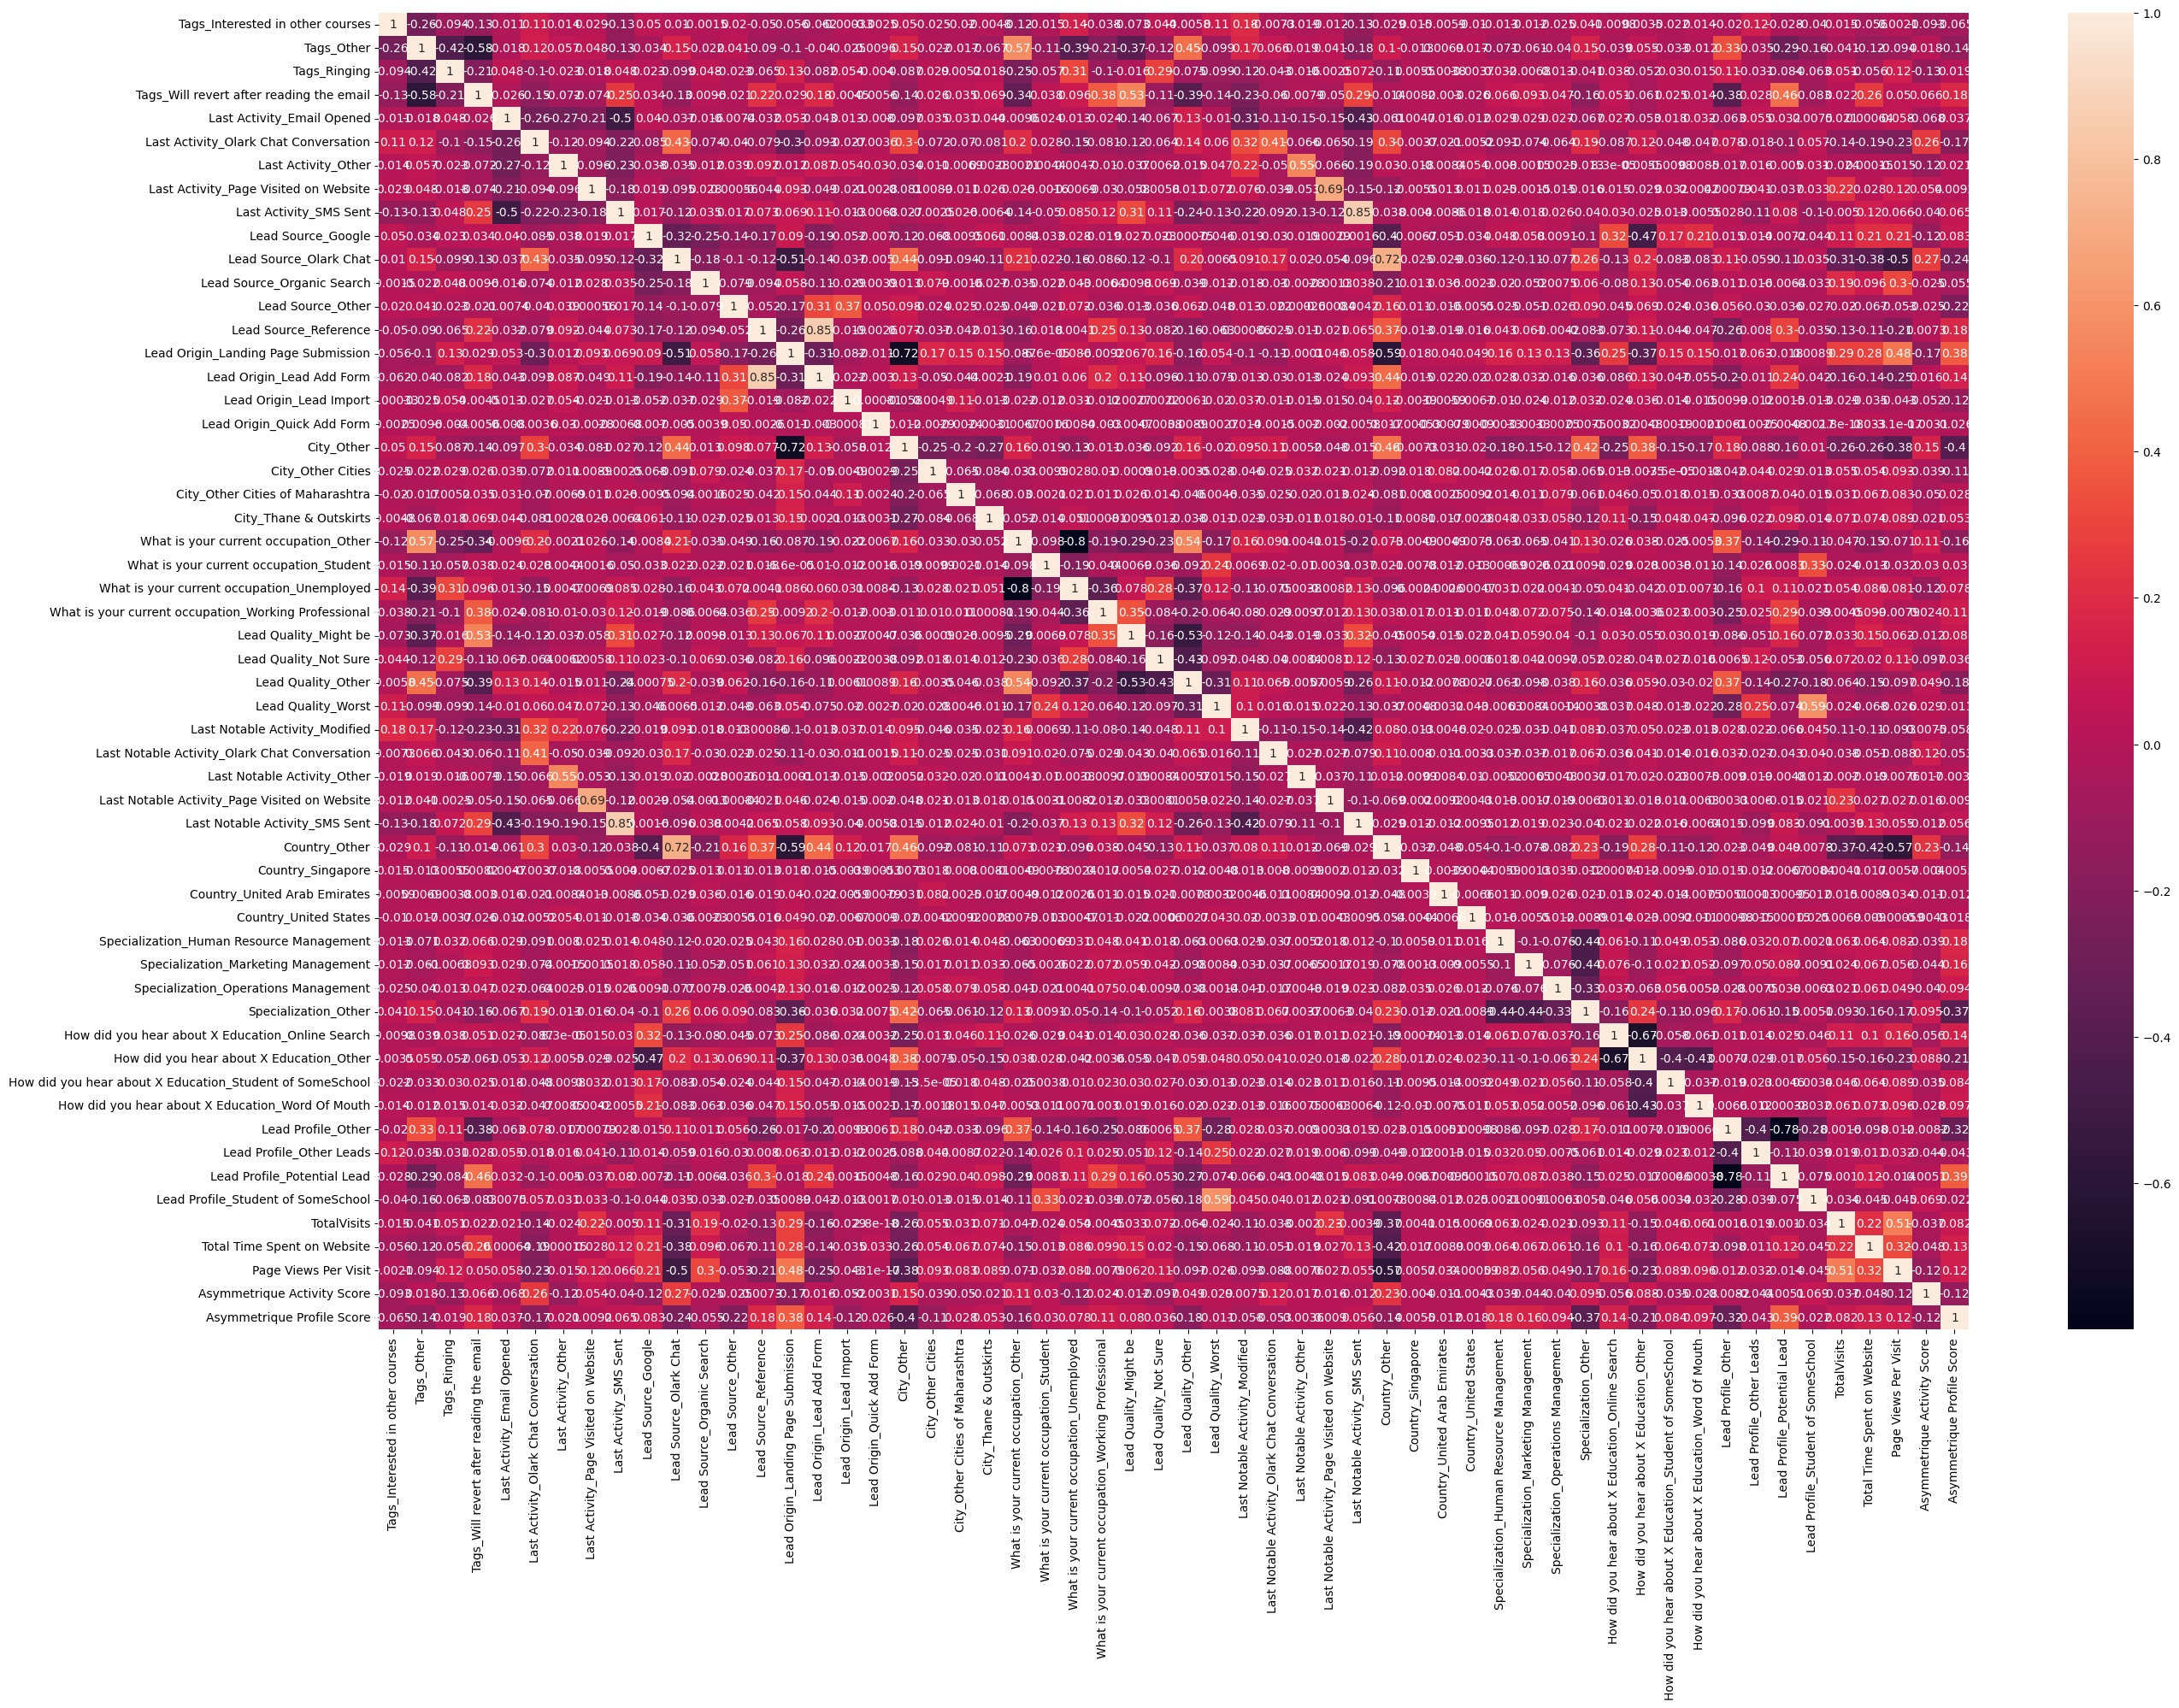

In [319]:
plt.figure(figsize = (30,20))
sns.heatmap(X_df.corr(),annot = True)
plt.show()

#### Remove high correlation, choose 0.6 as threshold

In [44]:
# Find the variables having high colleration with one another >= 70%
# Create a correlation matrix
correlation_matrix = X_df.corr()

# Find pairs of variables with correlation >= 0.7
high_correlation_pairs = (correlation_matrix.abs() >= 0.6) & (correlation_matrix < 1)

# Extract variable names with high correlation
high_correlation_variables = []

for col in high_correlation_pairs.columns:
    correlated_vars = high_correlation_pairs.index[high_correlation_pairs[col]].tolist()
    if correlated_vars:
        high_correlation_variables.extend([(col, correlated_var) for correlated_var in correlated_vars])

# Display the pairs of variables with high correlation
print("Pairs of variables with correlation >= 0.7:")
for pair in high_correlation_variables:
    print(pair)

Pairs of variables with correlation >= 0.7:
('Last Activity_Page Visited on Website', 'Last Notable Activity_Page Visited on Website')
('Last Notable Activity_Page Visited on Website', 'Last Activity_Page Visited on Website')
('How did you hear about X Education_Online Search', 'How did you hear about X Education_Other')
('How did you hear about X Education_Other', 'How did you hear about X Education_Online Search')


In [45]:
variables_to_remove = set()

for col in high_correlation_pairs.columns:
    correlated_vars = high_correlation_pairs.index[high_correlation_pairs[col]].tolist()
    if correlated_vars:
        # Add the variable with higher index to the removal set
        variables_to_remove.add(max(correlated_vars, key=lambda x: X_df.columns.get_loc(x)))
        
# Drop the identified variables
X_df = X_df.drop(columns=variables_to_remove)

# Display the remaining variables after removal
print("Variables remaining after removing high correlation:")
print(X_df.columns)

Variables remaining after removing high correlation:
Index(['Tags_Interested in other courses', 'Tags_Other', 'Tags_Ringing',
       'Tags_Will revert after reading the email',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Other', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Other',
       'Lead Origin_Lead Import', 'Lead Origin_Quick Add Form',
       'City_Other Cities', 'City_Other Cities of Maharashtra',
       'City_Thane & Outskirts', 'What is your current occupation_Student',
       'What is your current occupation_Working Professional',
       'Lead Quality_Might be', 'Lead Quality_Not Sure', 'Lead Quality_Other',
       'Lead Quality_Worst', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Other', 'Country_Singapore',
       'Country_United Arab Emirates', 'Country_United States',
       'Specialization_Human Resource Managemen

#### Visualization

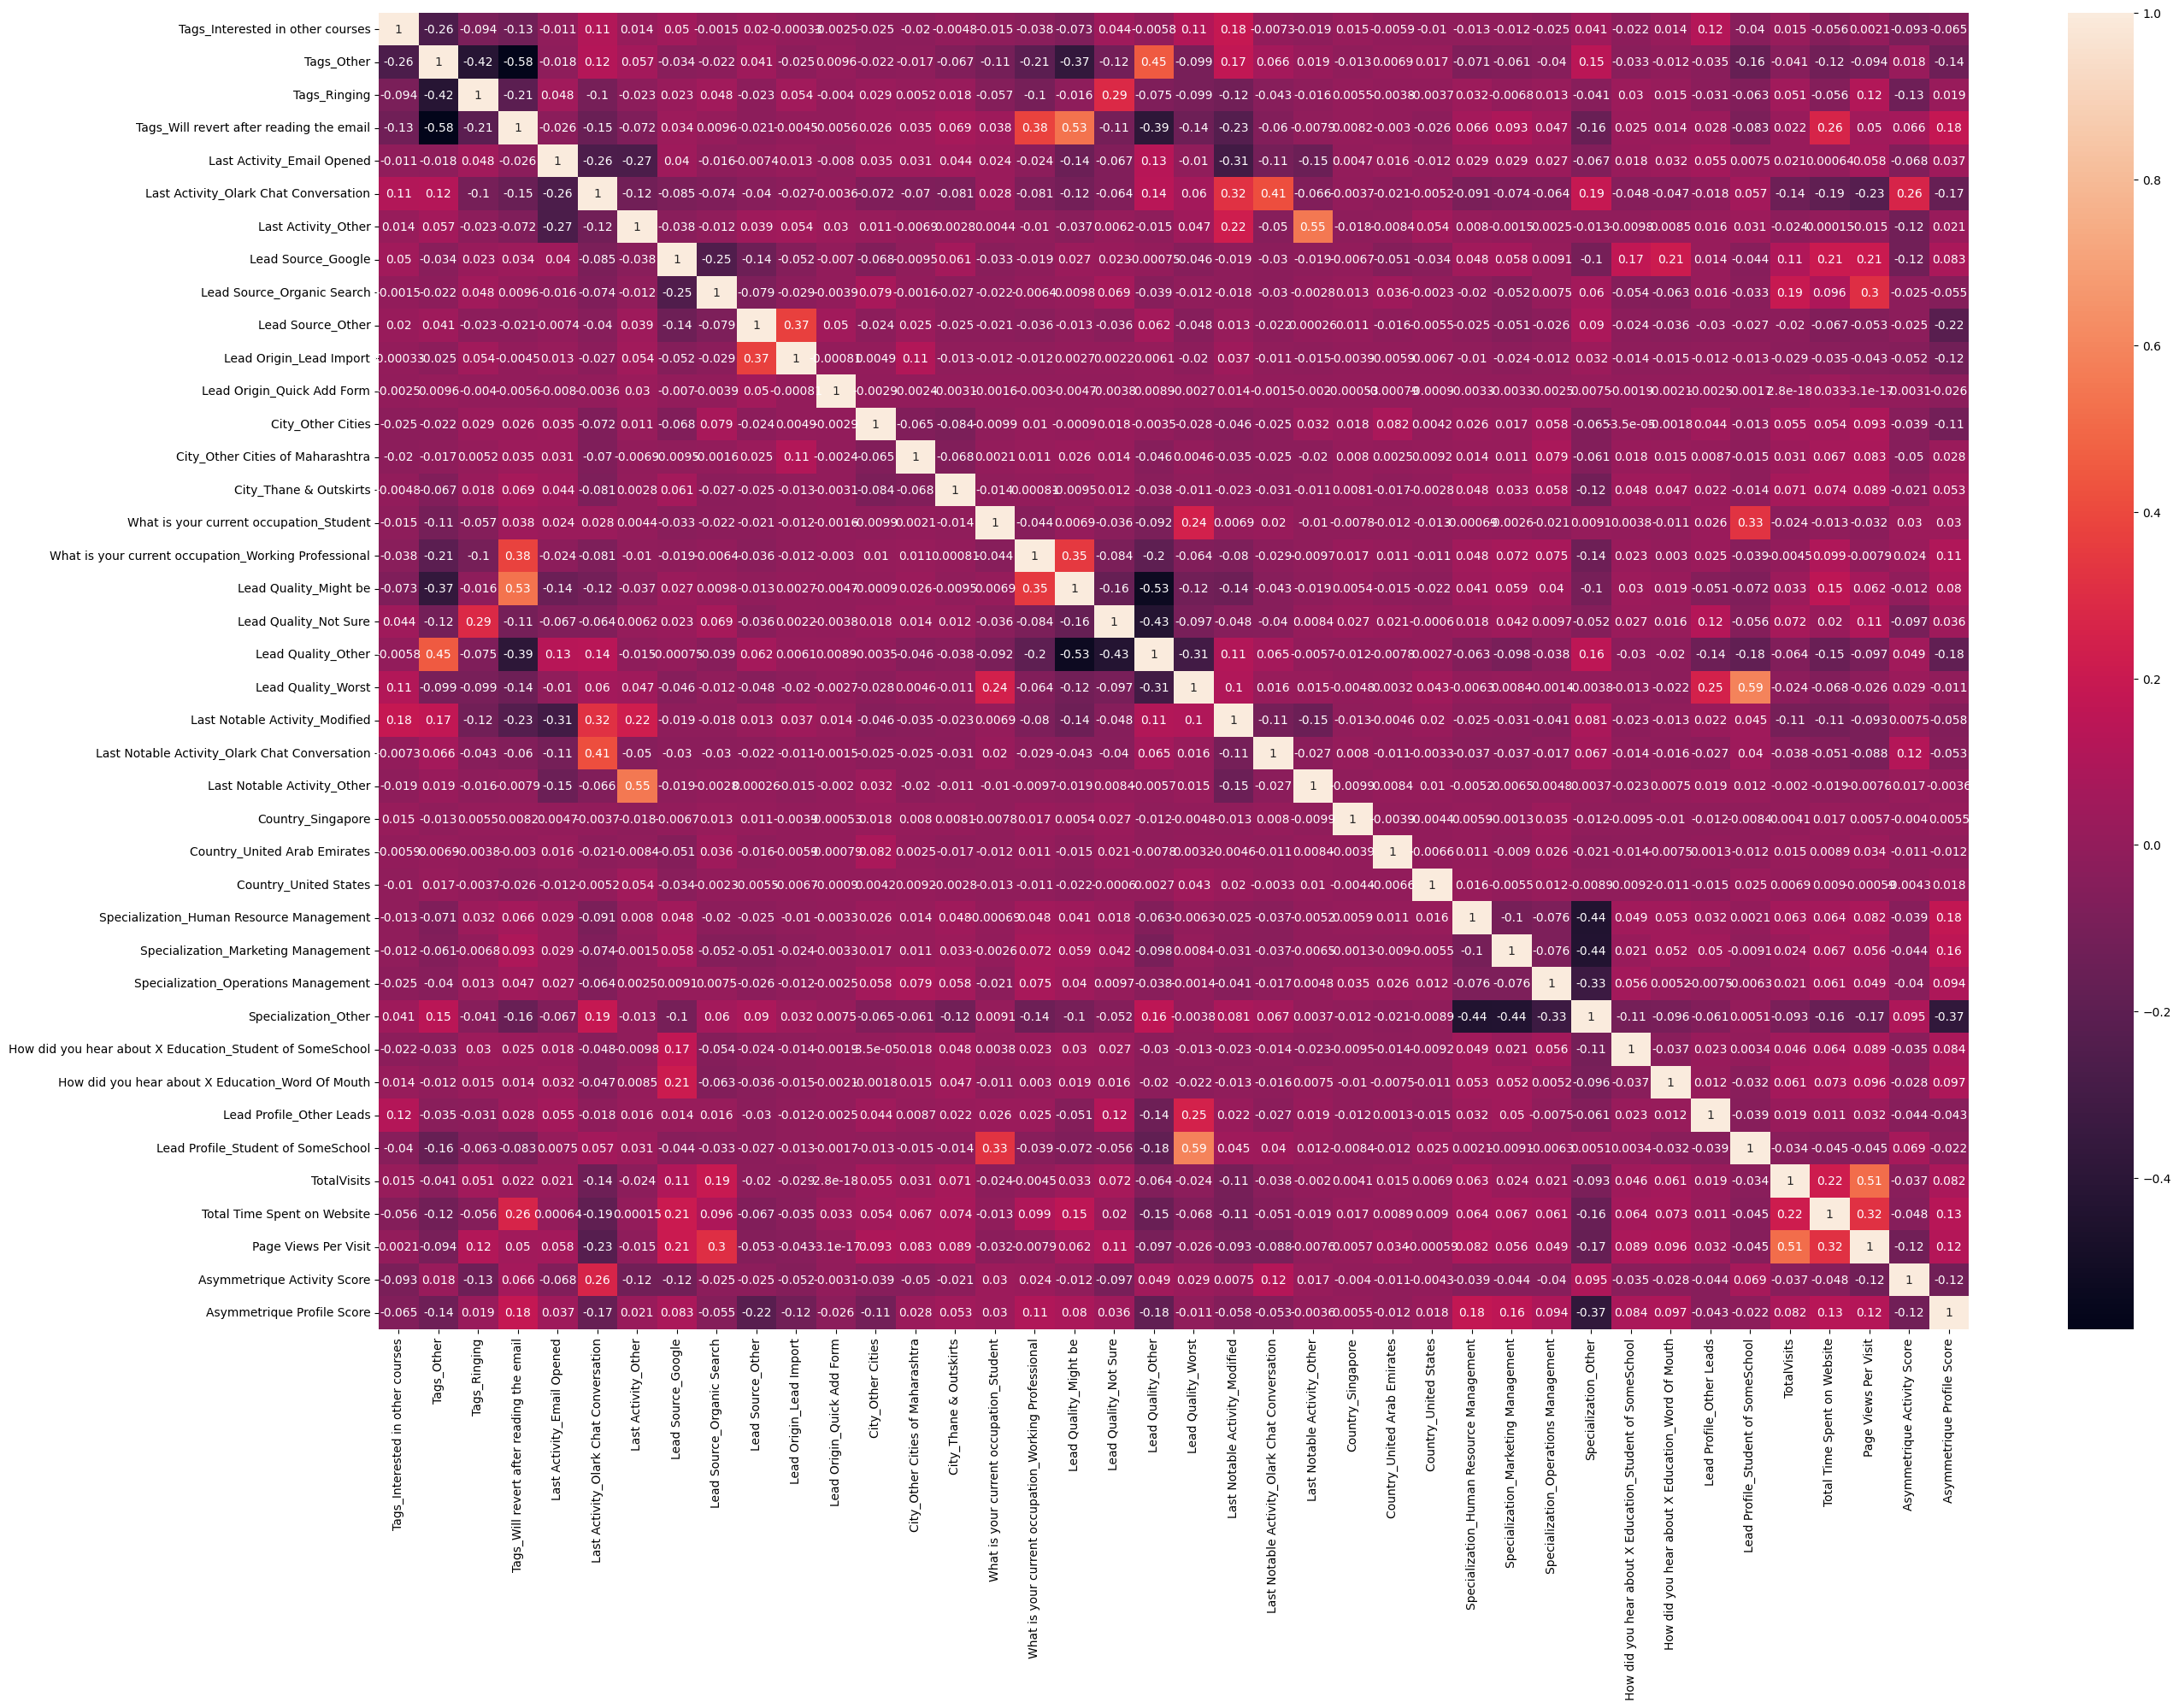

In [46]:
plt.figure(figsize = (30,20))
sns.heatmap(X_df.corr(),annot = True)
plt.show()

# Modeling

#### Split data to train sets and test sets

In [130]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_df, lead['Converted'], train_size=0.7, random_state=1)

In [131]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6468, 40), (2772, 40), (6468,), (2772,))

In [132]:
import statsmodels.api as sm

#### First model

In [133]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6427
Model Family:                Binomial   Df Model:                           40
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1746.4
Date:                Sun, 10 Mar 2024   Deviance:                       3492.8
Time:                        21:15:20   Pearson chi2:                 8.89e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.5459
Covariance Type:            nonrobust                                         
============================================================================================================================
                                                               coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
const                                                      -12.6545      1.424     -8.884      0.000     -15.446      -9.863
Tags_Interested in other courses                             1.5956      0.824      1.936      0.053      -0.019       3.211
Tags_Other                                                   4.2393      0.732      5.795      0.000       2.805       5.673
Tags_Ringing                                                 0.9520      0.765      1.244      0.213      -0.547       2.452
Tags_Will revert after reading the email                     7.7134      0.755     10.219      0.000       6.234       9.193
Last Activity_Email Opened                                  -0.8178      0.100     -8.138      0.000      -1.015      -0.621
Last Activity_Olark Chat Conversation                       -2.2703      0.264     -8.600      0.000      -2.788      -1.753
Last Activity_Other                                         -0.4341      0.192     -2.257      0.024      -0.811      -0.057
Lead Source_Google                                          -0.0183      0.111     -0.165      0.869      -0.235       0.199
Lead Source_Organic Search                                  -0.1021      0.156     -0.656      0.512      -0.407       0.203
Lead Source_Other                                            2.1531      0.206     10.470      0.000       1.750       2.556
Lead Origin_Lead Import                                     -2.4056      0.796     -3.022      0.003      -3.966      -0.845
Lead Origin_Quick Add Form                                  17.7554   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
City_Other Cities                                           -0.1930      0.176     -1.095      0.273      -0.538       0.152
City_Other Cities of Maharashtra                             0.0229      0.211      0.108      0.914      -0.391       0.437
City_Thane & Outskirts                                      -0.3795      0.181     -2.102      0.036      -0.733      -0.026
What is your current occupation_Student                      0.0760      0.407      0.187      0.852      -0.722       0.874
What is your current occupation_Working Professional         1.6784      0.292      5.744      0.000       1.106       2.251
Lead Quality_Might be                                       -3.1135      0.325     -9.570      0.000      -3.751      -2.476
Lead Quality_Not Sure                                       -3.1889      0.316    -10.096      0.000      -3.808      -2.570
Lead Quality_Other                                          -3.4364      0.289    -11.880      0.000      -4.003      -2.869
Lead Quality_Worst                                          -5.6892      0.508    -

#### Using REF to choose the best attributes

In [158]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [217]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, step=15)
rfe = rfe.fit(X_train, y_train)

In [218]:
rfe.support_

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
        True, False, False, False, False, False,  True,  True,  True,
        True,  True,  True,  True, False,  True, False, False, False,
       False, False, False, False, False,  True,  True,  True, False,
       False, False, False, False])

In [219]:
col = X_train.columns[rfe.support_]
print(len(col))
print(col)

20
Index(['Tags_Interested in other courses', 'Tags_Other', 'Tags_Ringing',
       'Tags_Will revert after reading the email',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Other', 'Lead Source_Google', 'Lead Source_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Working Professional',
       'Lead Quality_Might be', 'Lead Quality_Not Sure', 'Lead Quality_Other',
       'Lead Quality_Worst', 'Last Notable Activity_Modified',
       'Last Notable Activity_Other',
       'How did you hear about X Education_Word Of Mouth',
       'Lead Profile_Other Leads', 'Lead Profile_Student of SomeSchool'],
      dtype='object')


After the first time, there are 20 attributes remain. Howerver, when checking p-value, there's still attributes with p-value > 0.05

In [220]:
X_train_1 = X_train[col]

In [221]:
X_train_1_sm = sm.add_constant(X_train_1)
logm2 = sm.GLM(y_train,X_train_1_sm, family = sm.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2077.5
Date:                Sun, 10 Mar 2024   Deviance:                       4155.0
Time:                        21:46:57   Pearson chi2:                 7.06e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4969
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3533      0.765     -0.462      0.644      -1.853       1.146
Tags_Interested in other courses                         0.7478      0.811      0.922      0.356      -0.841       2.337
Tags_Other                                               3.5681      0.724      4.930      0.000       2.149       4.987
Tags_Ringing                                             0.4117      0.755      0.545      0.585      -1.068       1.891
Tags_Will revert after reading the email                 7.0229      0.741      9.472      0.000       5.570       8.476
Last Activity_Email Opened                              -0.8913      0.091     -9.825      0.000      -1.069      -0.714
Last Activity_Olark Chat Conversation                   -1.8894      0.193     -9.798      0.000      -2.267      -1.511
Last Activity_Other                                     -0.4544      0.166     -2.739      0.006      -0.780      -0.129
Lead Source_Google                                       0.1532      0.087      1.759      0.079      -0.018       0.324
Lead Source_Other                                        1.4406      0.166      8.661      0.000       1.115       1.767
What is your current occupation_Student                  0.3834      0.404      0.949      0.342      -0.408       1.175
What is your current occupation_Working Professional     1.8338      0.271      6.754      0.000       1.302       2.366
Lead Quality_Might be                                   -3.0526      0.294    -10.384      0.000      -3.629      -2.476
Lead Quality_Not Sure                                   -3.2397      0.285    -11.348      0.000      -3.799      -2.680
Lead Quality_Other                                      -3.3726      0.259    -13.005      0.000      -3.881      -2.864
Lead Quality_Worst                                      -5.6007      0.469    -11.953      0.000      -6.519      -4.682
Last Notable Activity_Modified                          -1.0248      0.098    -10.492      0.000      -1.216      -0.833
Last Notable Activity_Other                             -1.1330      0.269     -4.207      0.000      -1.661      -0.605
How did you hear about X Education_Word Of Mouth         0.3813      0.200      1.906      0.057      -0.011       0.773
Lead Profile_Other Leads                                 0.1917      0.210      0.913      0.361      -0.220       0.603
Lead Profile_Student of SomeSchool                       1.9538      0.875      2.232      0.026       0.238       3.669
========================================================================================================================
"""

Continue using FRE to remove attribute. After the second time, the number of atributes is 10.

In [222]:
rfe = rfe.fit(X_train_1, y_train)
col = X_train_1.columns[rfe.support_]
print(len(col))
print(col)

10
Index(['Tags_Other', 'Tags_Ringing',
       'Tags_Will revert after reading the email',
       'Last Activity_Olark Chat Conversation', 'Lead Source_Other',
       'What is your current occupation_Working Professional',
       'Lead Quality_Might be', 'Lead Quality_Not Sure', 'Lead Quality_Other',
       'Lead Quality_Worst'],
      dtype='object')


In [223]:
X_train_2 = X_train_1[col]
X_train_2_sm=sm.add_constant(X_train_2)
logm3 = sm.GLM(y_train,X_train_2_sm, family = sm.families.Binomial())
logm3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6457
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2191.9
Date:                Sun, 10 Mar 2024   Deviance:                       4383.7
Time:                        21:46:58   Pearson chi2:                 7.08e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4788
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0089      0.380     -2.658      0.008      -1.753      -0.265
Tags_Other                                               3.0457      0.310      9.817      0.000       2.438       3.654
Tags_Ringing                                             0.0986      0.374      0.263      0.792      -0.635       0.832
Tags_Will revert after reading the email                 6.5709      0.348     18.906      0.000       5.890       7.252
Last Activity_Olark Chat Conversation                   -1.8354      0.182    -10.080      0.000      -2.192      -1.479
Lead Source_Other                                        1.3619      0.156      8.732      0.000       1.056       1.668
What is your current occupation_Working Professional     1.5342      0.257      5.975      0.000       1.031       2.037
Lead Quality_Might be                                   -2.4729      0.289     -8.569      0.000      -3.039      -1.907
Lead Quality_Not Sure                                   -2.6178      0.278     -9.410      0.000      -3.163      -2.073
Lead Quality_Other                                      -2.9602      0.259    -11.449      0.000      -3.467      -2.453
Lead Quality_Worst                                      -4.9695      0.433    -11.487      0.000      -5.817      -4.122
========================================================================================================================
"""

Continue using FRE to remove attribute. After the second time, the number of atributes is 5.

In [224]:
rfe = rfe.fit(X_train_2, y_train)
col = X_train_2.columns[rfe.support_]
print(len(col))
print(col)

5
Index(['Tags_Other', 'Tags_Will revert after reading the email',
       'Lead Quality_Not Sure', 'Lead Quality_Other', 'Lead Quality_Worst'],
      dtype='object')


In [225]:
X_train_3 = X_train_1[col]
X_train_3_sm=sm.add_constant(X_train_3)
logm4 = sm.GLM(y_train,X_train_3_sm, family = sm.families.Binomial())
logm4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6462
Model Family:                Binomial   Df Model:                            5
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2388.4
Date:                Sun, 10 Mar 2024   Deviance:                       4776.8
Time:                        21:47:00   Pearson chi2:                 6.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4461
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.5678      0.188    -13.629      0.000      -2.937      -2.199
Tags_Other                                   3.0787      0.181     17.032      0.000       2.724       3.433
Tags_Will revert after reading the email     6.5385      0.230     28.451      0.000       6.088       6.989
Lead Quality_Not Sure                       -1.0929      0.151     -7.227      0.000      -1.389      -0.796
Lead Quality_Other                          -1.4892      0.113    -13.195      0.000      -1.710      -1.268
Lead Quality_Worst                          -3.4527      0.364     -9.487      0.000      -4.166      -2.739
============================================================================================================
"""

#### Predict on test set

In [226]:
X_train_3.shape, X_train_3_sm.shape

((6468, 5), (6468, 6))

In [229]:
model_result = logm4.fit()
y_train_pred=round(model_result.predict(X_train_3_sm),0)
y_train_pred

5261    0.0
2901    0.0
6969    0.0
1256    0.0
1554    0.0
       ... 
2895    0.0
7813    1.0
905     0.0
5192    0.0
235     0.0
Length: 6468, dtype: float64

In [247]:
X_test_sm = sm.add_constant(X_test[col])
y_test_pred= model_result.predict(X_test_sm)
y_test_pred_final = round(y_test_pred,0)
y_test_pred_final

2140    1.0
7707    1.0
1522    1.0
1873    0.0
8100    0.0
       ... 
2491    0.0
4850    0.0
7829    1.0
2999    1.0
7677    0.0
Length: 2772, dtype: float64

# Evaluation

#### Basic metric: accuracy, recall, sensitivity, specificity, false postive rate

In [231]:
from sklearn import metrics


In [248]:
confusion = metrics.confusion_matrix(y_test, y_test_pred_final)
print(confusion)

[[1620   57]
 [ 359  736]]


In [249]:
# Độ chính xác của mô hình
metrics.accuracy_score(y_test, y_test_pred_final)

0.84992784992785

In [250]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [251]:
# Sensitivity
TP / float(TP+FN)

0.6721461187214612

In [252]:
# Specificity
TN / float(TN+FP)

0.9660107334525939

In [253]:
# false postive rate
print(FP/ float(TN+FP))

0.03398926654740608


In [254]:
# positive predictive value 
print (TP / float(TP+FP))

0.9281210592686002


In [255]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8185952501263264


#### ROC Curve

In [256]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [257]:
fpr, tpr, thresholds = metrics.roc_curve( y_test, y_test_pred_final, drop_intermediate = False )

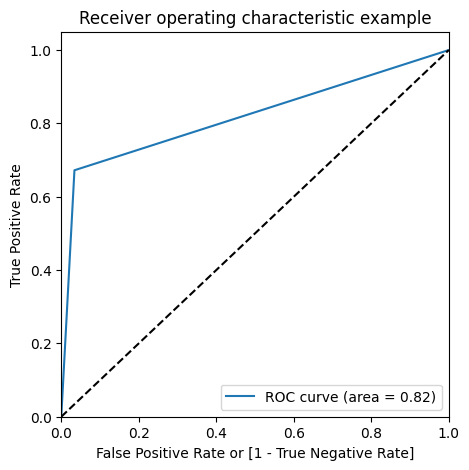

In [258]:
draw_roc(y_test, y_test_pred_final)

### Finding the best threshold

In [270]:
result = pd.DataFrame(y_test_pred, columns= ['Prob'])
result['Predict'] = round(y_test_pred,0)

In [271]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    result[i]= result['Prob'].map(lambda x: 1 if x>i else 0)
result.head()

Prob  Predict  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
2140  0.625019      1.0    1    1    1    1    1    1    1    0    0    0
7707  0.981489      1.0    1    1    1    1    1    1    1    1    1    1
1522  0.981489      1.0    1    1    1    1    1    1    1    1    1    1
1873  0.071239      0.0    1    0    0    0    0    0    0    0    0    0
8100  0.273240      0.0    1    1    1    0    0    0    0    0    0    0

In [273]:
# Tính toán accuracy sensitivity and specificity cho từng điểm giớ hạn xác suất
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(result['Predict'], result[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.286075  1.000000  0.000000
0.1   0.1  0.539322  1.000000  0.354725
0.2   0.2  0.539322  1.000000  0.354725
0.3   0.3  0.955988  1.000000  0.938353
0.4   0.4  1.000000  1.000000  1.000000
0.5   0.5  1.000000  1.000000  1.000000
0.6   0.6  1.000000  1.000000  1.000000
0.7   0.7  0.946970  0.814628  1.000000
0.8   0.8  0.946970  0.814628  1.000000
0.9   0.9  0.946970  0.814628  1.000000


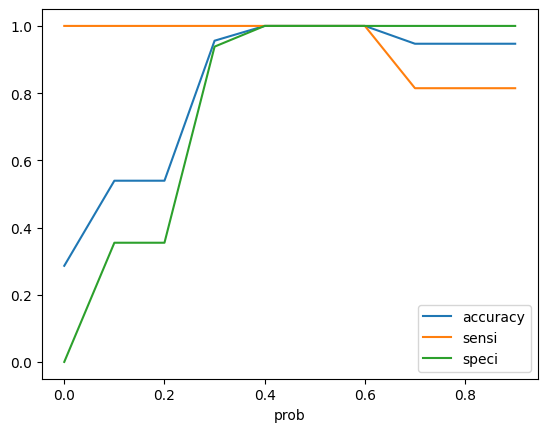

In [274]:
# Biểu diễn các đường accuracy sensitivity and specificity
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

It indicates that 0.4, 0.5 and 0.6 will give the best accuracy for model. We could use 0.5 as above

In [286]:
y_pred_final = result['Prob'].map(lambda x: 1 if x>0.5 else 0)
metrics.accuracy_score(y_test, y_pred_final)

0.84992784992785